In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

/home/vt337/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
data_dir = Path("Data/r77-mini-data-fortnight")

input_dir = data_dir.joinpath("input")
fixed_input_dir = input_dir.joinpath("fixed")
temporal_input_dir = input_dir.joinpath("temporal")
target_dir = data_dir.joinpath("target")
fixed_target_dir = target_dir.joinpath("fixed")
temporal_target_dir = target_dir.joinpath("temporal")

In [4]:
files_ti = list(temporal_input_dir.iterdir())
files_fi = list(fixed_input_dir.iterdir())
files_tt = list(temporal_target_dir.iterdir())
files_ft = list(fixed_target_dir.iterdir())

In [5]:
index_dir = Path("Index")
files_index = list(index_dir.iterdir())
indices = np.load(files_index[0]).squeeze()

#First hour of data
index = indices[0]

In [6]:
ti = np.load(files_ti[index]).squeeze()
print(f'temporal input shape: {ti.shape}')

fi = np.load(files_fi[index]).squeeze()
print(f'fixed input shape: {fi.shape}')

tt = np.load(files_tt[index]).squeeze()
print(f'temporal target shape: {tt.shape}')

ft = np.load(files_ft[index]).squeeze()
print(f'fixed target shape: {ft.shape}')

temporal input shape: (144, 70, 3)
fixed input shape: (144, 2)
temporal target shape: (144, 70, 100, 3)
fixed target shape: (144, 100, 2)


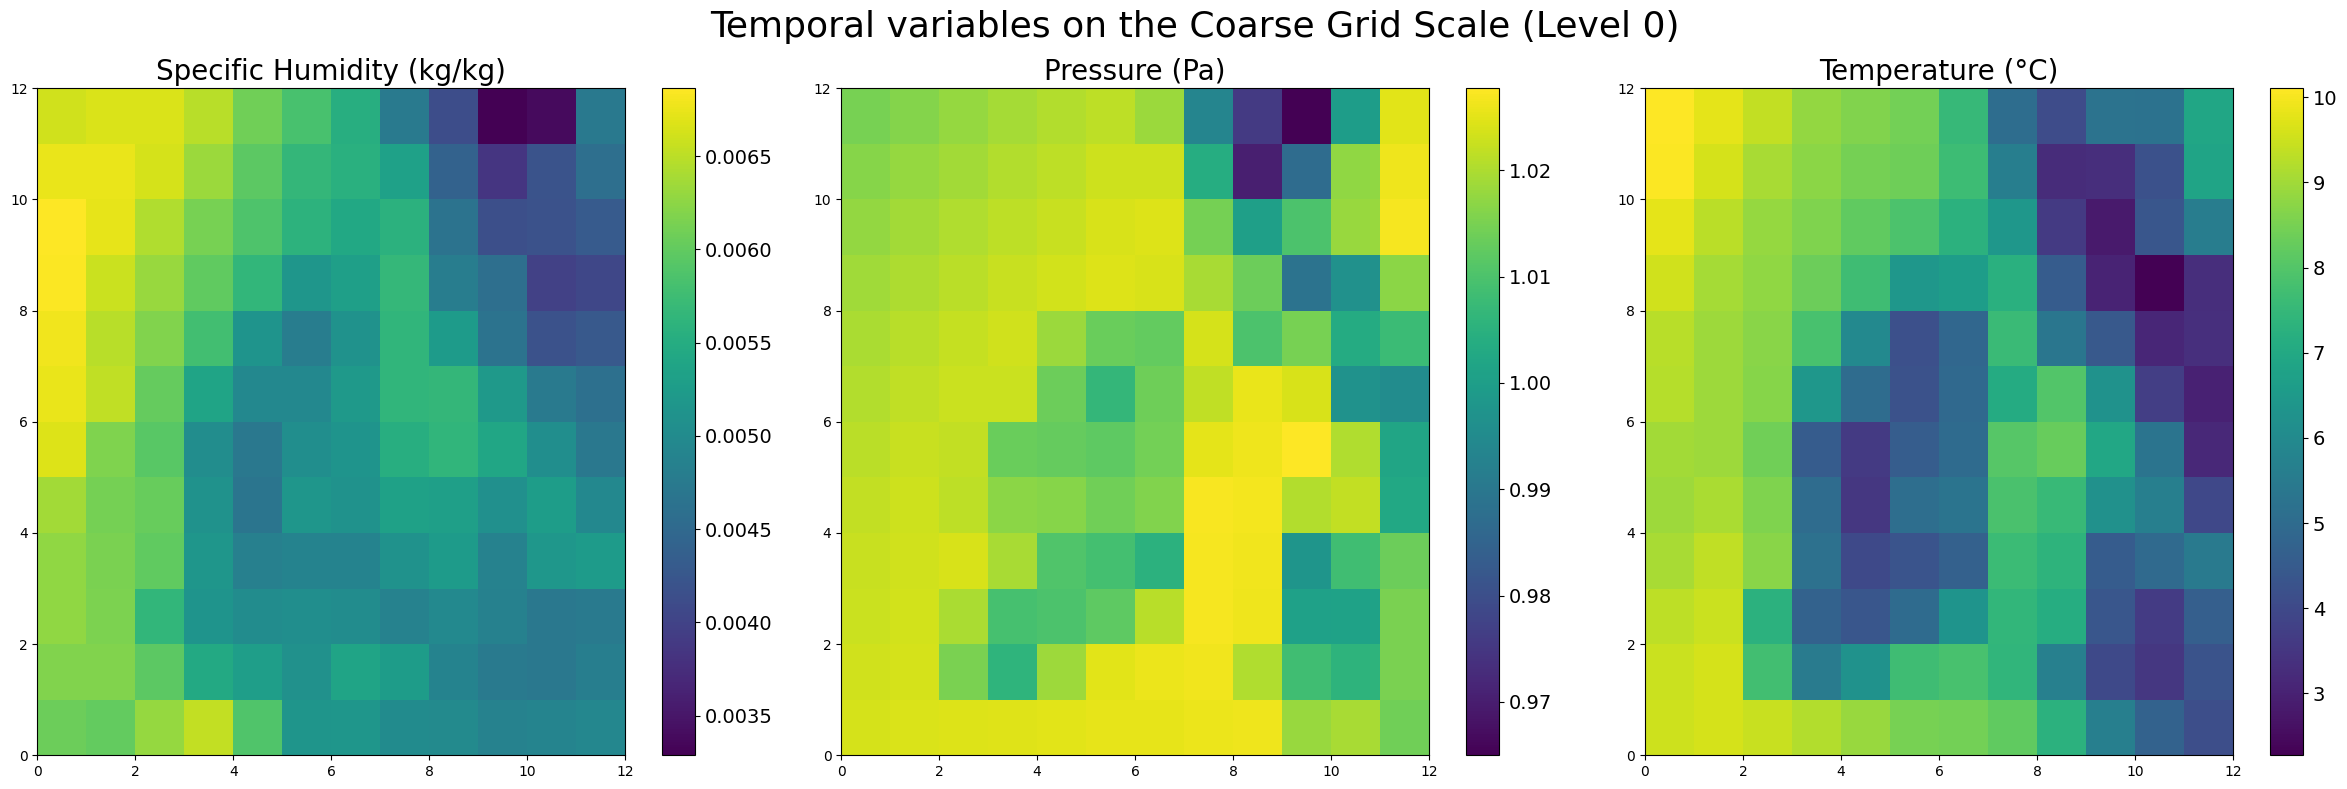

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

#humidity
surface_humidity = ti[:, 0, 0].reshape(12, 12) * 0.025
pcm = axs[0].pcolormesh(surface_humidity)
axs[0].set_title("Specific Humidity (kg/kg)", fontsize = 20)
cbar = fig.colorbar(pcm, ax=axs[0]) 
cbar.ax.tick_params(labelsize=14)  

#pressure
surface_pressure = ti[:, 0, 1].reshape(12, 12) * 106000 / 100000
pcm = axs[1].pcolormesh(surface_pressure, )
axs[1].set_title("Pressure (Pa)", fontsize = 20)  
cbar = fig.colorbar(pcm, ax=axs[1])
cbar.ax.tick_params(labelsize=14) 

#temp
surface_temp = ti[:, 0, 2].reshape(12, 12) * 180 + 140 - 273.15
pcm = axs[2].pcolormesh(surface_temp)  
axs[2].set_title("Temperature (\u00B0C)", fontsize = 20)  
cbar = fig.colorbar(pcm, ax=axs[2])
cbar.ax.tick_params(labelsize=14) 

fig.suptitle("Temporal variables on the Coarse Grid Scale (Level 0)", fontsize = 26)

plt.tight_layout()
plt.show()

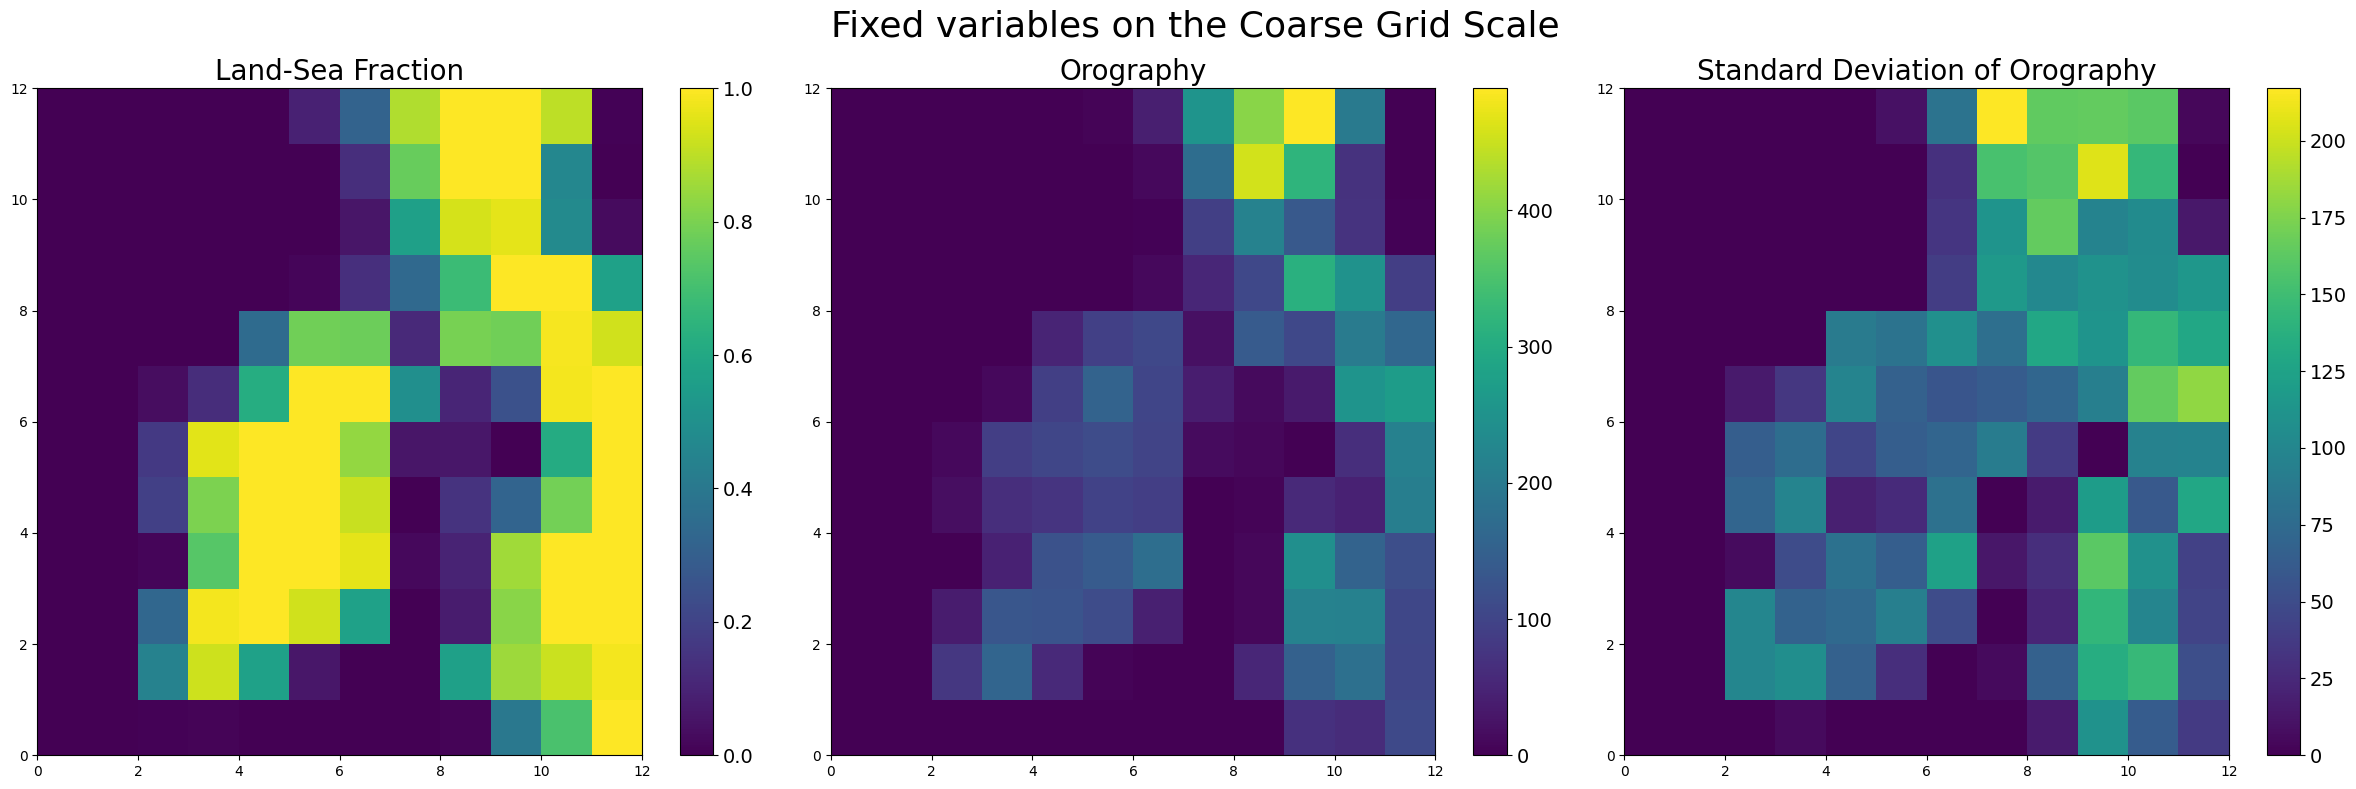

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

#lsm
lsm = fi[:, 0].reshape(12, 12)
pcm = axs[0].pcolormesh(lsm)
axs[0].set_title("Land-Sea Fraction", fontsize = 20)
cbar = fig.colorbar(pcm, ax=axs[0]) 
cbar.ax.tick_params(labelsize=14)  

#orog
orog = fi[:, 1].reshape(12, 12) * 4000
pcm = axs[1].pcolormesh(orog)
axs[1].set_title("Orography", fontsize = 20)  
cbar = fig.colorbar(pcm, ax=axs[1])
cbar.ax.tick_params(labelsize=14) 

#stdev orog
subgrid_orog = ft[:, :, 1]
stdev_orog = np.std(subgrid_orog, axis=1)
stdev_orog = stdev_orog.reshape(12,12)*4000
pcm = axs[2].pcolormesh(stdev_orog)  
axs[2].set_title("Standard Deviation of Orography", fontsize = 20)  
cbar = fig.colorbar(pcm, ax=axs[2])
cbar.ax.tick_params(labelsize=14) 

fig.suptitle("Fixed variables on the Coarse Grid Scale", fontsize = 26)

plt.tight_layout()
plt.show()

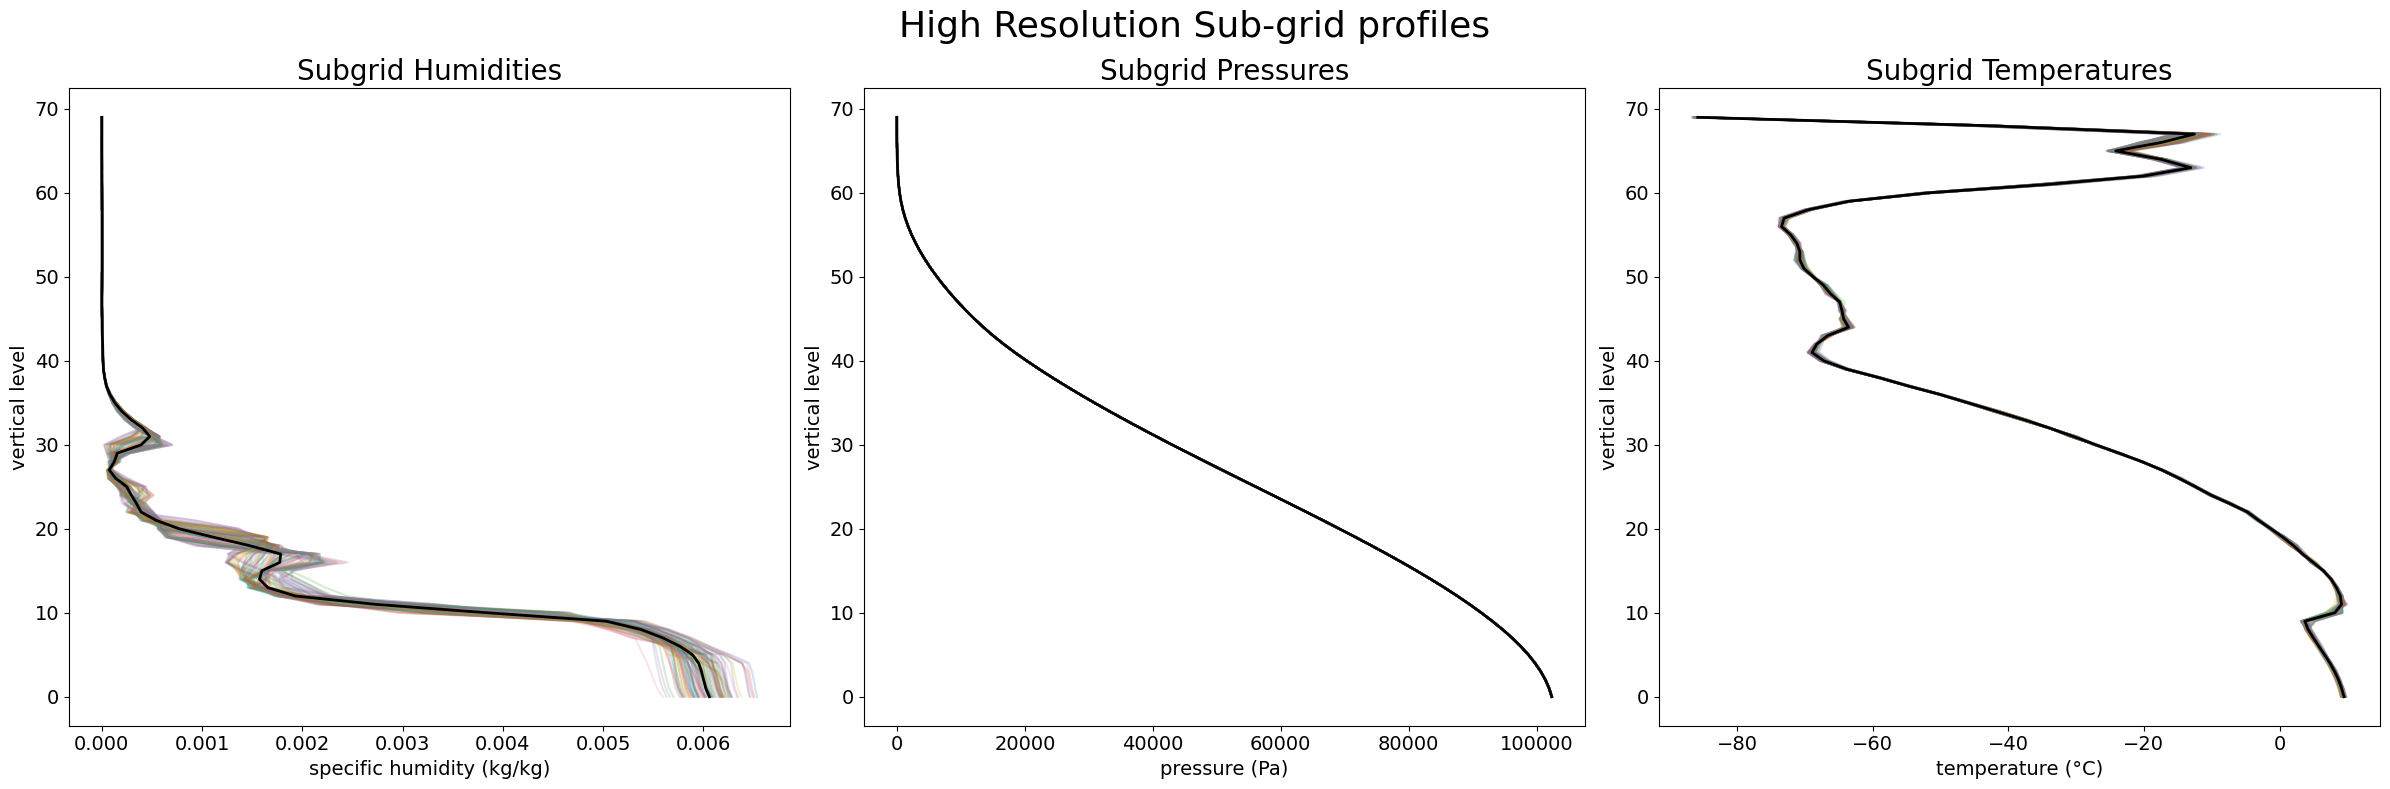

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

#humidity
subgrid_humidities = tt[0, :, :, 0] * 0.025
for i in range(100):
    axs[0].plot(subgrid_humidities[:,i], np.arange(70), alpha = 0.2)
axs[0].set_xlabel("specific humidity (kg/kg)",fontsize = 14)
axs[0].set_ylabel("vertical level", fontsize = 14)
axs[0].set_title("Subgrid Humidities", fontsize = 20)
axs[0].tick_params(axis='both', labelsize=14) 

humidity = ti[0, :, 0] * 0.025
axs[0].plot(humidity, np.arange(70), color = 'black', linewidth = 2)

#pressure
subgrid_pressures = tt[0, :, :, 1]* 106000
for i in range(100):
    axs[1].plot(subgrid_pressures[:,i], np.arange(70), alpha = 0.2)
axs[1].set_xlabel("pressure (Pa)",fontsize = 14)
axs[1].set_ylabel("vertical level",fontsize = 14)
axs[1].set_title("Subgrid Pressures", fontsize = 20)
axs[1].tick_params(axis='both', labelsize=14) 

pressure = ti[0, :, 1]* 106000
axs[1].plot(pressure, np.arange(70), color = 'black', linewidth = 2)

#temp
subgrid_temperatures = tt[0, :, :, 2] * 180 + 140 -273.15
for i in range(100):
    axs[2].plot(subgrid_temperatures[:,i], np.arange(70), alpha = 0.2)
axs[2].set_xlabel("temperature (\u00B0C)",fontsize = 14)
axs[2].set_ylabel("vertical level",fontsize = 14)
axs[2].set_title("Subgrid Temperatures", fontsize = 20)
axs[2].tick_params(axis='both', labelsize=14) 

temperature = ti[0, :, 2] *180 + 140 -273.15
axs[2].plot(temperature, np.arange(70), color = 'black', linewidth = 2)


fig.suptitle("High Resolution Sub-grid profiles", fontsize = 26)

plt.tight_layout()
plt.show()

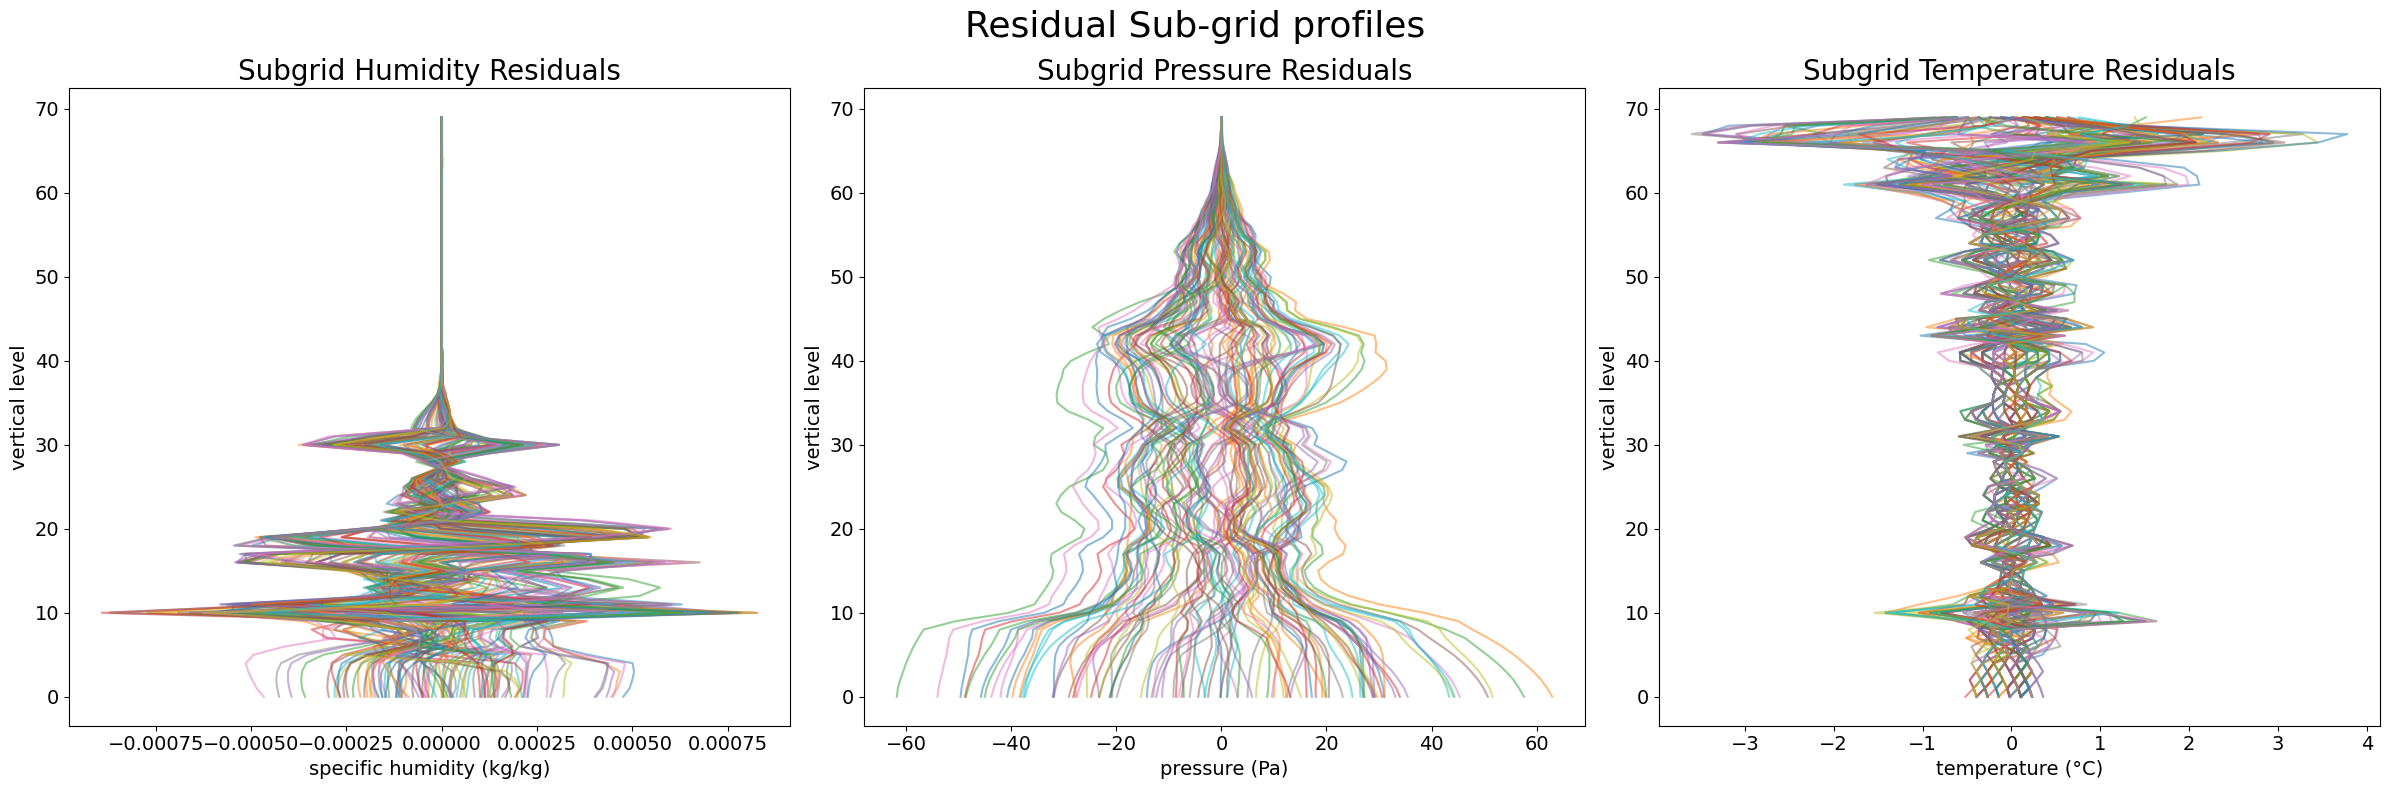

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

#humidity
subgrid_humidities = tt[0, :, :, 0] * 0.025
humidity = ti[0, :, 0] * 0.025
for i in range(100):
    axs[0].plot(subgrid_humidities[:,i]- humidity, np.arange(70), alpha = 0.5)
axs[0].set_xlabel("specific humidity (kg/kg)",fontsize = 14)
axs[0].set_ylabel("vertical level", fontsize = 14)
axs[0].set_title("Subgrid Humidity Residuals", fontsize = 20)
axs[0].tick_params(axis='both', labelsize=14) 


#pressure
subgrid_pressures = tt[0, :, :, 1]* 106000
pressure = ti[0, :, 1]* 106000
for i in range(100):
    axs[1].plot(subgrid_pressures[:,i] - pressure, np.arange(70), alpha = 0.5)
axs[1].set_xlabel("pressure (Pa)",fontsize = 14)
axs[1].set_ylabel("vertical level",fontsize = 14)
axs[1].set_title("Subgrid Pressure Residuals", fontsize = 20)
axs[1].tick_params(axis='both', labelsize=14) 



#temp
subgrid_temperatures = tt[0, :, :, 2] * 180 + 140 -273.15
temperature = ti[0, :, 2] *180 + 140 -273.15
for i in range(100):
    axs[2].plot(subgrid_temperatures[:,i] - temperature, np.arange(70), alpha = 0.5)
axs[2].set_xlabel("temperature (\u00B0C)",fontsize = 14)
axs[2].set_ylabel("vertical level",fontsize = 14)
axs[2].set_title("Subgrid Temperature Residuals", fontsize = 20)
axs[2].tick_params(axis='both', labelsize=14) 



fig.suptitle("Residual Sub-grid profiles", fontsize = 26)

plt.tight_layout()
plt.show()

NB: Would be good to remove the vertical variation by normalising by the means and standard deviations of
the variables at each vertical level (or some other normalisation method, just something to get everything
onto the same scale)

BUT it's also important to consider that for example humidity high up is basically zero so we really care a lot more about the humidity at low altitudes, so any normalisation method that removes this distinction is probably not so good. Perhaps applying some simple linear weighting function above a certain altitude would be good for humidity.

As above, learning anomalies is probably better than learning the full profiles because the subgrid profiles are always basically the mean plus some small perturbation.

# Avoiding negative humidities

If the anomaly to the humidity is learned, it's very important that the mean + anomaly is not negative.
I suppose you could solve that by clamping the anomaly, not sure how to deal with it otherwise.

Probably don't need to worry about the temperature and pressures going negative because the anomalies are
so much smaller than the means.



In [12]:
specific_humidity

NameError: name 'specific_humidity' is not defined

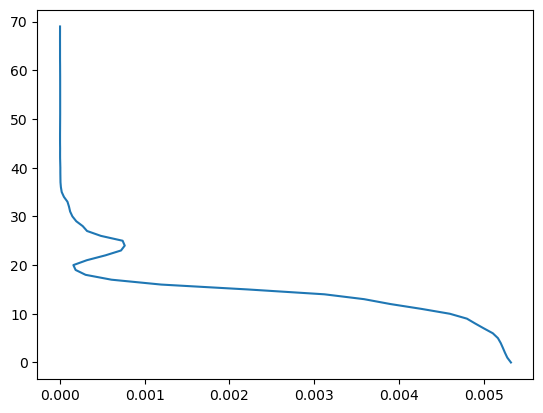

In [ ]:
plt.plot(specific_humidity, np.arange(70))

In [ ]:
subgrid_humidities

array([[5.5069923e-03, 5.1676035e-03, 5.4459572e-03, ..., 5.4772496e-03,
        5.1858425e-03, 5.3295493e-03],
       [5.4511428e-03, 5.1369071e-03, 5.3998232e-03, ..., 5.4236650e-03,
        5.1542521e-03, 5.2807927e-03],
       [5.4119229e-03, 5.1162243e-03, 5.3743124e-03, ..., 5.3901076e-03,
        5.1342845e-03, 5.2505136e-03],
       ...,
       [2.3841858e-06, 2.5033951e-06, 2.3841858e-06, ..., 2.4437904e-06,
        2.2649765e-06, 2.2649765e-06],
       [2.3841858e-06, 2.4437904e-06, 2.5033951e-06, ..., 2.4437904e-06,
        2.4437904e-06, 2.4437904e-06],
       [2.5033951e-06, 2.5033951e-06, 2.5033951e-06, ..., 2.5033951e-06,
        2.5033951e-06, 2.4437904e-06]], dtype=float32)

In [ ]:
sum(specific_humidity)

0.08038386162775168